### Business Requirements

* What is the optimum machine setup for maximal output?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Data Cleaning Step

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Output_Optimization_Project/qed_20240327_strictly_confidential.csv').iloc[:, 1:]

In [ ]:
selected_columns = sorted([col for col in data.columns if 'dpid' not in col])
data = data[selected_columns]

In [ ]:
sorted(data.columns)

['application_issue1',
 'application_issue2',
 'batch_id',
 'batch_name',
 'blender_speed1',
 'blender_speed2',
 'bulk_density',
 'compressibility_index',
 'cone_wheel',
 'distribution_wheel',
 'dosing_wheel',
 'dwell_time',
 'emptying_pressure',
 'emptying_time',
 'filling_cam',
 'filling_device',
 'filling_device_speed',
 'filling_length',
 'filling_plate',
 'filling_time',
 'filling_wheel',
 'hausner_ratio',
 'head_flat_diameter',
 'intermediate_plate',
 'loss_on_drying',
 'material_sealing',
 'maximal_ejection_force',
 'mean_hardness',
 'mean_main_compression',
 'mean_pre_compression',
 'mean_weight',
 'multi_layer',
 'number_of_punches',
 'output_amount',
 'output_volume',
 'output_weight',
 'particle_diameter_dx10',
 'particle_diameter_dx50',
 'particle_diameter_dx90',
 'pitch_circle_diameter',
 'pitch_circle_speed',
 'position_gear_wheel_fom',
 'press_type',
 'product_api',
 'product_scraper',
 'punch_type',
 'reason_for_trial',
 'rotor_speed',
 'sd_main_compression',
 'sealing_

In [ ]:
data

,application_issue1,application_issue2,batch_id,batch_name,blender_speed1,blender_speed2,bulk_density,compressibility_index,cone_wheel,distribution_wheel,...,sealing_segment_size,span_value,suction_time,tablet_diameter,tablet_long_side,tablet_mean_weight,tablet_narrow_side,tablet_scraper,tapped_density,water_activity
0,NaN,NaN,70,2020,0,0,0.332,26.26,NaN,3513242.0,...,25,0.000000,0,10.0,0.0,260.0,0.0,2197963.0,0.451,0.000
1,NaN,NaN,568,862,0,0,0.927,17.00,NaN,3511846.0,...,16,4.295811,0,0.0,7.6,170.0,7.6,7118555.0,1.117,0.000
2,NaN,NaN,593,903,0,0,0.000,0.00,NaN,7071433.0,...,25,2.542965,0,0.0,12.0,2000.0,12.0,7347143.0,0.000,0.000
3,NaN,NaN,612,982,0,0,0.798,23.00,NaN,3513242.0,...,0,9.850433,0,28.0,0.0,4635.0,0.0,NaN,1.036,0.000
4,NaN,NaN,704,931,0,0,0.617,12.00,NaN,3513242.0,...,25,2.767819,0,0.0,18.0,684.0,7.0,NaN,0.701,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,contamination,segregation,2620,N/A (7),0,0,0.000,0.00,NaN,3501465.0,...,0,0.000000,0,8.0,0.0,0.0,0.0,NaN,0.000,0.000
84,NaN,NaN,2643,1109,0,0,0.843,12.00,NaN,3501465.0,...,0,1.721720,0,25.0,0.0,0.0,0.0,NaN,0.958,0.351
85,NaN,NaN,2700,1106,300,300,0.472,32.00,NaN,3513242.0,...,27,5.031585,0,0.0,18.5,0.0,9.5,NaN,0.694,0.199
86,NaN,NaN,2737,1108,0,0,0.448,31.31,NaN,3513242.0,...,25,5.074392,0,1.5,0.0,0.0,0.0,7373678.0,0.653,0.246


In [ ]:
dropping_columns = [
    'batch_id', 'batch_name', 'material_sealing',
    'reason_for_trial', 'product_api'
]

In [ ]:
for col in data.columns:
    if col not in dropping_columns:
        if data[col].dtype == 'O':
            data[col] = data[col].fillna('not_specified')
        else:
            data[col] = data[col].fillna(0)
            if (data[col].nunique() == 1) :
                if col not in dropping_columns:
                    dropping_columns.append(col)
            elif (data[col].nunique() < 20) and (col in ['tablet_diameter', 'tablet_long_side', 'tablet_narrow_side']):
                data[col] = data[col].fillna(123).astype(int).astype(str).replace('123', 'not_specified')

for col in ['tablet_diameter', 'tablet_long_side', 'tablet_narrow_side']:
    data[col] = data[col].astype(float)

data.drop(columns = dropping_columns, inplace = True)
data.isnull().sum()

application_issue1         0
application_issue2         0
blender_speed1             0
blender_speed2             0
bulk_density               0
compressibility_index      0
cone_wheel                 0
distribution_wheel         0
dosing_wheel               0
dwell_time                 0
filling_cam                0
filling_device             0
filling_device_speed       0
filling_length             0
filling_plate              0
filling_time               0
filling_wheel              0
hausner_ratio              0
head_flat_diameter         0
intermediate_plate         0
loss_on_drying             0
maximal_ejection_force     0
mean_hardness              0
mean_main_compression      0
mean_pre_compression       0
mean_weight                0
multi_layer                0
number_of_punches          0
output_amount              0
output_volume              0
output_weight              0
particle_diameter_dx10     0
particle_diameter_dx50     0
particle_diameter_dx90     0
pitch_circle_d

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   application_issue1       88 non-null     object 
 1   application_issue2       88 non-null     object 
 2   blender_speed1           88 non-null     int64  
 3   blender_speed2           88 non-null     int64  
 4   bulk_density             88 non-null     float64
 5   compressibility_index    88 non-null     float64
 6   cone_wheel               88 non-null     float64
 7   distribution_wheel       88 non-null     float64
 8   dosing_wheel             88 non-null     float64
 9   dwell_time               88 non-null     float64
 10  filling_cam              88 non-null     int64  
 11  filling_device           88 non-null     object 
 12  filling_device_speed     88 non-null     int64  
 13  filling_length           88 non-null     int64  
 14  filling_plate            88 

In [ ]:
data.application_issue1.unique().tolist()

['not_specified',
 'sticking on upper punches',
 'Sticking',
 'sticking',
 'weight-variation',
 'tablet-flow',
 'capping',
 'contamination']

In [ ]:
data.application_issue2.unique().tolist()

['not_specified', 'broken-tablets', 'segregation']

In [ ]:
dropping_columns2 = ['application_issue1', 'application_issue2']
data['application_issue1'] = data['application_issue1'].replace('capping', 'not_specified')
for i, (issue1, issue2) in enumerate(zip(data.application_issue1.fillna(''), data.application_issue2.fillna(''))):
    if (issue1 != 'not_specified' or issue2 != 'not_specified'):
        data.loc[i, 'output_amount'] = 0
        data.loc[i, 'output_weight'] = 0
        data.loc[i, 'output_volume'] = 0

data.drop(columns = dropping_columns2, inplace = True)

In [ ]:
data.shape

(88, 49)

In [ ]:
data.head()

,blender_speed1,blender_speed2,bulk_density,compressibility_index,cone_wheel,distribution_wheel,dosing_wheel,dwell_time,filling_cam,filling_device,...,sd_main_compression,sealing_segment_size,span_value,tablet_diameter,tablet_long_side,tablet_mean_weight,tablet_narrow_side,tablet_scraper,tapped_density,water_activity
0,0,0,0.332,26.26,0.0,3513242.0,3501466.0,0.000000,12,FOM95,...,7.0,25,0.000000,10.0,0.0,260.0,0.0,2197963.0,0.451,0.0
1,0,0,0.927,17.00,0.0,3511846.0,3511845.0,0.004579,6,FOM95,...,1.8,16,4.295811,0.0,7.0,170.0,7.0,7118555.0,1.117,0.0
2,0,0,0.000,0.00,0.0,7071433.0,7071435.0,0.102314,20,FOM95,...,3.6,25,2.542965,0.0,12.0,2000.0,12.0,7347143.0,0.000,0.0
3,0,0,0.798,23.00,0.0,3513242.0,3513114.0,0.000000,10,FOM95,...,2.3,0,9.850433,28.0,0.0,4635.0,0.0,0.0,1.036,0.0
4,0,0,0.617,12.00,0.0,3513242.0,0.0,0.004902,12,FOM95,...,3.3,25,2.767819,0.0,18.0,684.0,7.0,0.0,0.701,0.0


Text(0.5, 1.0, 'linear correlation of variables')

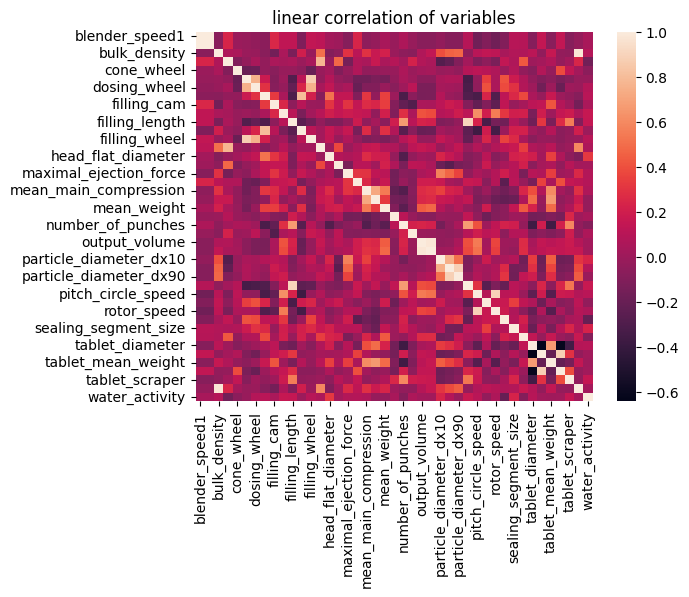

In [ ]:
sns.heatmap(data.select_dtypes(include = 'number').corr())
plt.title('linear correlation of variables')

### Data Preparation

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import(
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import(
    GridSearchCV,
    KFold,
    StratifiedKFold,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
X_train = data.copy()
X_train.drop(columns = ['output_weight', 'output_volume', 'output_amount'], inplace = True)
y_train = data[['output_weight']].copy()

In [ ]:
assert len([col for col in X_train.columns if 'output' in col]) == 0

In [ ]:
X_train.shape, y_train.shape

((88, 46), (88, 1))

In [ ]:
scalers = {}
rescaledXnum = pd.DataFrame()
for col in X_train.select_dtypes(include = 'number'):
    scaler = StandardScaler().fit(X_train[col].values.reshape((-1, 1)))
    scalers[col] = scaler
    rescaledXnum[col] = scaler.transform(X_train[col].values.reshape((-1, 1))).reshape((1,-1))[0]

In [ ]:
encoders = {}
rescaledXcat = pd.DataFrame()
for col in X_train.select_dtypes(include = 'object').columns:
    encoder = LabelEncoder()
    encoder.fit(X_train[col])
    rescaledXcat[col] = encoder.transform(X_train[col])
    encoders[col] = encoder

In [ ]:
X_train.dosing_wheel.unique()

array([3501466., 3511845., 7071435., 3513114.,       0., 3504187.,
       3107005., 7238703., 3502638., 3501464., 9105101., 3513106.,
       7071453., 7281454.])

In [ ]:
rescaledX = pd.concat([rescaledXnum, rescaledXcat], axis = 1)

In [ ]:
rescaledX, X_test, y_train, y_test = train_test_split(rescaledX, y_train, test_size = 0.05, shuffle = True)
rescaledX.shape, X_test.shape

((83, 46), (5, 46))

### Modeling

In [ ]:
n_estimators = range(100, 1000, 100) # [100, 200, 300, ...., 900]
max_depth = range(2, 10, 2) #[2, ...., 9]
criterion = ['squared_error', 'absolute_error']
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, criterion=criterion)
model = RandomForestRegressor(n_jobs=-1, random_state = 42)
kfold = KFold(n_splits=5)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

# Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
ranks = grid_result.cv_results_["rank_test_score"]
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: -112.940759 using {'criterion': 'absolute_error', 'max_depth': 8, 'n_estimators': 800}
#56 -117.224263 (46.651433) with: {'criterion': 'squared_error', 'max_depth': 2, 'n_estimators': 100}
#69 -119.137685 (46.238907) with: {'criterion': 'squared_error', 'max_depth': 2, 'n_estimators': 200}
#67 -118.818500 (46.025259) with: {'criterion': 'squared_error', 'max_depth': 2, 'n_estimators': 300}
#70 -119.155315 (46.021259) with: {'criterion': 'squared_error', 'max_depth': 2, 'n_estimators': 400}
#68 -119.064148 (46.010448) with: {'criterion': 'squared_error', 'max_depth': 2, 'n_estimators': 500}
#66 -118.693750 (45.764705) with: {'criterion': 'squared_error', 'max_depth': 2, 'n_estimators': 600}
#63 -118.445968 (45.772121) with: {'criterion': 'squared_error', 'max_depth': 2, 'n_estimators': 700}
#64 -118.476969 (45.810934) with: {'criterion': 'squared_error', 'max_depth': 2, 'n_estimators': 800}
#65 -118.650229 (45.709237) with: {'criterion': 'squared_error', 'max_depth': 2, 'n_estimat

In [ ]:
model = RandomForestRegressor(n_jobs=-1, criterion='absolute_error', max_depth = 8, n_estimators = 800)
model.fit(rescaledX, y_train) - # forward mapping input -> output

RandomForestRegressor(criterion='absolute_error', max_depth=8, n_estimators=800,
                      n_jobs=-1)

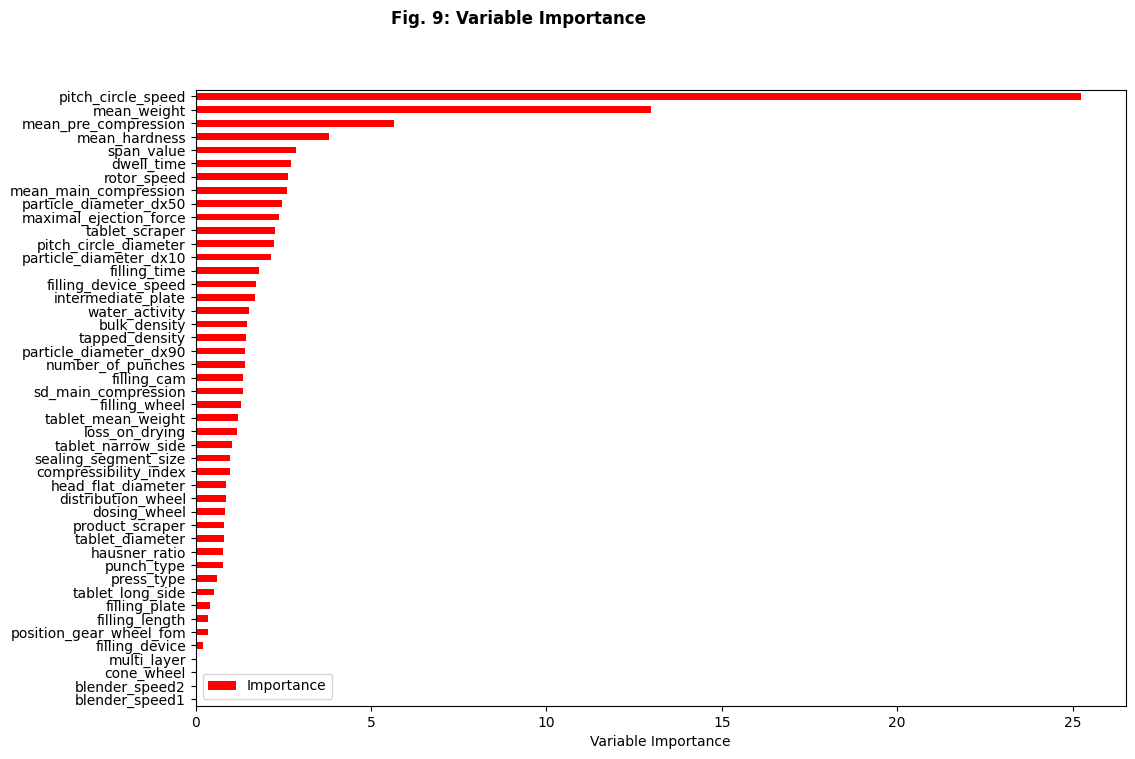

In [ ]:
Importance = pd.DataFrame(
    {"Importance": model.feature_importances_ * 100}, index=rescaledX.columns
)
Importance.sort_values("Importance", axis=0, ascending=True).plot(
    kind="barh", color="r", figsize=(12, 8)
)
plt.xlabel("Variable Importance")
plt.suptitle(
    "Fig. 9: Variable Importance", fontweight="bold", horizontalalignment="right"
)
plt.show()

In [ ]:
Importance[Importance.Importance > 1].index.tolist()

['bulk_density',
 'dwell_time',
 'filling_cam',
 'filling_device_speed',
 'filling_time',
 'filling_wheel',
 'loss_on_drying',
 'maximal_ejection_force',
 'mean_hardness',
 'mean_main_compression',
 'mean_pre_compression',
 'mean_weight',
 'number_of_punches',
 'particle_diameter_dx10',
 'particle_diameter_dx50',
 'particle_diameter_dx90',
 'pitch_circle_diameter',
 'pitch_circle_speed',
 'rotor_speed',
 'sd_main_compression',
 'span_value',
 'tablet_mean_weight',
 'tablet_narrow_side',
 'tablet_scraper',
 'tapped_density',
 'water_activity',
 'intermediate_plate']

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
#train_error
prediction = model.predict(rescaledX)
mean_absolute_error(y_train, prediction)

25.602472983584338

In [ ]:
#test_error
test_prediction = model.predict(X_test)
mean_absolute_error(y_test, test_prediction)

49.086543664999645

In [ ]:
output = y_train.copy()
output['prediction'] = prediction
output

,output_weight,prediction
84,0.000,32.215484
86,0.000,46.639513
78,106.812,107.954603
76,0.000,80.186137
15,34.560,28.433635
...,...,...
50,26.314,33.965649
56,20.432,24.936292
80,396.540,317.491468
73,0.000,60.777918


### Optimization

In [ ]:
### function (inputs ) = output

In [ ]:
## maximize output > inputs?

In [ ]:
# backward mapping objective - maximize

In [ ]:
import numpy as np
from scipy.optimize import minimize
from copy import copy

In [ ]:
known_bounds = pd.read_excel('/content/drive/MyDrive/Output_Optimization_Project/bounds.xlsx')

In [ ]:
known_bounds

,Group,Parameter,Min,Max
0,Tablet Characteristics,mean_hardness,0.0,300.0
1,NaN,mean_weight,0.0,6000.0
2,Powder Characteristics,loss_on_drying,1.0,5.0
3,NaN,water_activity,0.2,0.8
4,NaN,tapped_density,0.5,1.5
5,NaN,bulk_density,0.4,1.4
6,NaN,particle_diameter_dx10,0.0,400.0
7,NaN,particle_diameter_dx50,0.0,500.0
8,NaN,particle_diameter_dx90,0.0,2000.0
9,NaN,hausner_ratio,0.0,1.4


In [ ]:
bnds = []
for col in rescaledX.columns:
    if col in known_bounds.Parameter.tolist():

        bnd =  (
                scalers[col].transform([known_bounds[known_bounds.Parameter == col].Min.values])[0][0],
                scalers[col].transform([known_bounds[known_bounds.Parameter == col].Max.values])[0][0]
            )
    else:
        bnd = (rescaledX[col].min(), rescaledX[col].max())
    #print(col, bnd)
    bnds.append(bnd)
bnds = tuple(bnds)

In [ ]:
class Optimizer():

    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.regressor = RandomForestRegressor(
            n_jobs=-1,
            criterion='absolute_error',
            max_depth = 8,
            n_estimators = 900,
            random_state = 42
        )
        self.fit()

    def fit(self):
        self.regressor.fit(self.X, self.y)

    def optimize(self):
        x0 = []
        for col in self.X.columns:
            if col in rescaledXnum.columns:
                x0.append(self.X[col].max())
            else:
                x0.append(self.X[col][self.y[self.y.output_weight == self.y.output_weight.max()].index[0]])
        #x0 = [rescaledX[col].sample(1).values[0] for col in rescaledX.columns]
        result = minimize(fun=self.prediction,
                          x0=np.array(x0),
                          method='SLSQP',
                          bounds = bnds,
                        )
        return result

    def prediction(self, x):
        prediction = self.regressor.predict([x])
        return -prediction[0] #output weight maximize

In [ ]:
optimize_model = Optimizer(X = rescaledX, y = y_train)

result = optimize_model.optimize()
result_x_df = pd.DataFrame([result.x], columns = rescaledX.columns)
result_x_df['output_weight'] = result.fun * -1

In [ ]:
-1 * optimize_model.prediction(
    rescaledX.iloc[y_train[y_train.output_weight == y_train.output_weight.max()].index[0], :].values
) # recheck for maximum in sample

111.56995859999961

In [ ]:
machine_setting = result_x_df.copy()
machine_setting.head()

,blender_speed1,blender_speed2,bulk_density,compressibility_index,cone_wheel,distribution_wheel,dosing_wheel,dwell_time,filling_cam,filling_device_speed,...,tablet_scraper,tapped_density,water_activity,filling_device,filling_plate,intermediate_plate,position_gear_wheel_fom,press_type,punch_type,output_weight
0,9.327379,9.327379,2.5987,1.242527,9.327379,2.41003,1.812688,5.92586,2.863819,2.633324,...,1.356173,2.618149,3.365879,1.0,4.0,1.0,1.0,2.0,1.0,373.605421


In [ ]:
for col in machine_setting.columns[:-1]:
    if col in rescaledXcat.columns:
        machine_setting[col] = [encoders[col].inverse_transform(machine_setting[col].astype(int))[0]]
    elif col in rescaledXnum.columns:
        machine_setting[col] = scalers[col].inverse_transform(machine_setting[col].values.reshape((-1,1)))[0]

In [ ]:
result = machine_setting.round(4).T.reset_index().sort_values('index')
result.columns = ['parameter', 'optimum_value']

In [ ]:
result # recommending setting.

,parameter,optimum_value
0,blender_speed1,300.0
1,blender_speed2,300.0
2,bulk_density,1.279
3,compressibility_index,25.0
4,cone_wheel,7114079.0
5,distribution_wheel,9105128.0
6,dosing_wheel,9105101.0
7,dwell_time,0.1637
8,filling_cam,22.0
40,filling_device,FOM95


In [ ]:
#data[['output_weight', 'output_volume']].corr()

,output_weight,output_volume
output_weight,1.000000,0.978127
output_volume,0.978127,1.000000


### recalculating volume and tablets

In [ ]:
from scipy.stats import linregress
linregress(data['output_weight'], data['output_volume'])

LinregressResult(slope=1.4842939123683, intercept=-0.10465081040879909, rvalue=0.9781269037332245, pvalue=1.9855465184176035e-60, stderr=0.03403750225669204, intercept_stderr=5.5262907145090825)

In [ ]:
## output_volume = 1.48 * output_weight
print("Output Volume : " , round((1.48 * result[result.parameter == 'output_weight']['optimum_value'].values[0])))

Output Volume :  553


In [ ]:
import math

In [ ]:
#tablet volume = (long_side * diameter * narrow_side) + (pi * radius^2 * narrow_side)
print("Number of Tablet : ", round(552 * 1000000 / ((22 * 12 * 19) + (math.pi * 6**2 * 19))))

Number of Tablet :  77043


In [ ]:
# 77 k tablets/h [ diameter 34, long_side 22, narrow_side 19 ]